# Analysis of $T_{pk}$'s of traits vs latitude and lab growth / rearing temperatures   

In [40]:
#TODO: (maybe) show equation and goodness of fit stats on all plots

rm(list=ls())
graphics.off()

require('tidyverse')
require('ggpubr') # to arrange multiple plots

## Relationship of $T_{pk}$ of $\alpha$ vs latitude

In [41]:
##### Relationship of $T_{pk}$ of $\alpha$ vs latitude #####

alphaLat <- as_tibble(read_csv('../data/TraitData.csv')) %>%
                rename(species = interactor1) %>%
                # select(species, standardisedtraitname, latitude) %>%
                filter(standardisedtraitname == '1/alpha' & latitude != 'NA') %>%
                distinct(species, latitude)

alphaMass <- as_tibble(read_csv('../data/a_pksT_pksMass.csv'))  %>% 
                select(-curve_ID) 
# %>% 
                # select (species, a_pk, T_pk, mass)

head(alphaLat)

head(alphaMass)

alphaLat_data <- alphaMass %>% inner_join(alphaLat) %>%
                    mutate(a_pkmassCor = a_pk/mass^-0.265)

head(alphaLat_data)

Rows: 1292 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 45 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): a_pk, a_pkLwr, a_pkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,latitude
<chr>,<dbl>
Acyrthosiphon pisum,36.500000
Paracoccus marginatus,25.468722
Bemisia tabaci,-6.800000
Antestiopsis thunbergii,-3.334883
Monochamus leuconotus,-3.334883
Anopheles gambiae,6.455027


a_pk,a_pkLwr,a_pkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.13092688,0.11653634,0.17892343,Aedes albopictus,31.160,29.71966,33.57167,2.202857
0.08282502,0.07845487,0.09416154,Bemisia tabaci,29.751,29.29720,30.64074,0.293125
0.11794938,0.11695474,0.11889669,Tetraneura nigriabdominalis,30.648,30.55200,30.78080,0.867300
0.15281755,0.14210782,0.16417956,Stethorus punctillum,32.875,32.76915,32.97900,0.480000
0.35107259,0.31915106,0.38473489,Tetranychus mcdanieli,35.182,34.96051,35.80812,0.024300
0.16981269,0.14732489,0.19346606,Tetranychus urticae,31.467,28.65830,33.43763,0.024300


Joining, by = "species"


a_pk,a_pkLwr,a_pkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass,latitude,a_pkmassCor
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.13092688,0.11653634,0.17892343,Aedes albopictus,31.160,29.71966,33.57167,2.202857,46.07488,0.16140619
0.08282502,0.07845487,0.09416154,Bemisia tabaci,29.751,29.29720,30.64074,0.293125,-6.80000,0.05983159
0.11794938,0.11695474,0.11889669,Tetraneura nigriabdominalis,30.648,30.55200,30.78080,0.867300,24.15000,0.11358226
0.15281755,0.14210782,0.16417956,Stethorus punctillum,32.875,32.76915,32.97900,0.480000,46.79110,0.12580624
0.35107259,0.31915106,0.38473489,Tetranychus mcdanieli,35.182,34.96051,35.80812,0.024300,46.79110,0.13109393
0.16981269,0.14732489,0.19346606,Tetranychus urticae,31.467,28.65830,33.43763,0.024300,35.70969,0.06340972


`geom_smooth()` using formula 'y ~ x'



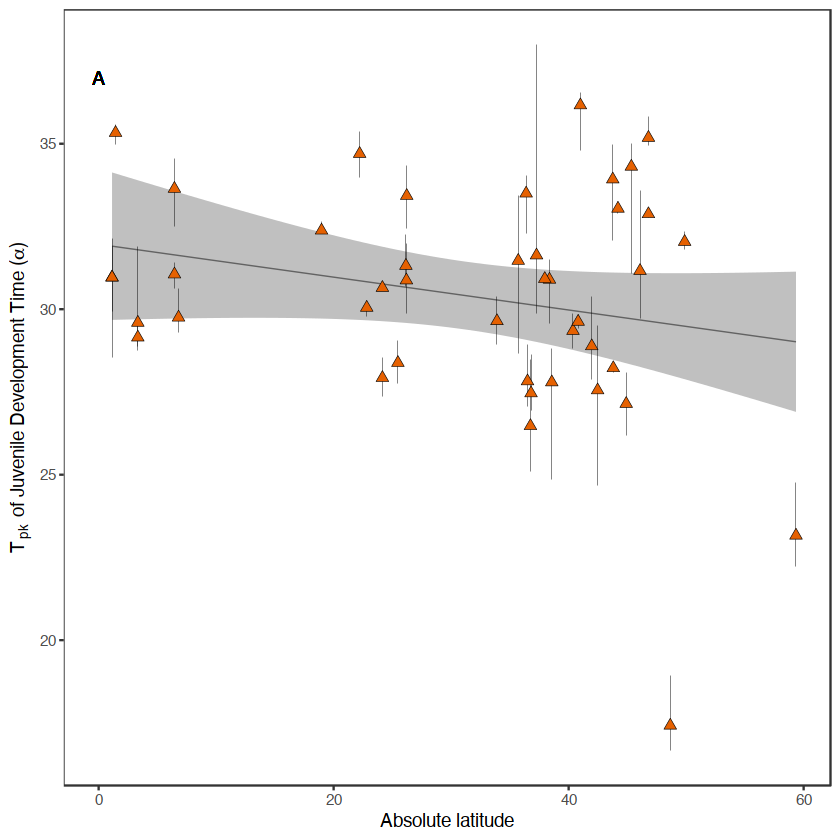

In [42]:
a_T_pklat_plot <-
  alphaLat_data %>%
  ggplot(aes(x= abs(latitude), y = T_pk))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill='#636363')+
  scale_y_continuous(expression(paste(italic(T[pk]), " of Juvenile Development Time (", italic(alpha),")")))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_linerange(aes(ymin =T_pkLwr , ymax = T_pkUpr),size= 0.1,col="#000000")+
  theme_bw()+
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape=24, fill ='#e66101')+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 0, y = 37,label = "A"), 
                parse = TRUE, size = 4, colour = "black")

a_T_pklat_plot

In [43]:
a_T_pklatmodel <- lm( T_pk ~ latitude, data = alphaLat_data)
summary(a_T_pklatmodel)
anova(a_T_pklatmodel)


Call:
lm(formula = T_pk ~ latitude, data = alphaLat_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9817  -2.1468  -0.1579   1.7702   6.3903 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.75681    0.82227  38.621   <2e-16 ***
latitude    -0.04837    0.02359  -2.051   0.0467 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.261 on 41 degrees of freedom
Multiple R-squared:  0.09302,	Adjusted R-squared:  0.0709 
F-statistic: 4.205 on 1 and 41 DF,  p-value: 0.04674


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
latitude,1,44.71762,44.71762,4.204934,0.04673559
Residuals,41,436.01691,10.63456,NA,NA


## Relationship of $T_{pk}$ of $b_{max}$ vs latitude

In [44]:
##### ## Relationship of $T_{pk}$ of $b_{max}$ vs latitude #####

bmaxLat <- as_tibble(read_csv('../data/TraitData.csv')) %>%
                rename(species = interactor1) %>%
                filter(standardisedtraitname == 'bmax' & latitude != 'NA') %>%
                distinct(species, latitude)

bmaxMass <- as_tibble(read_csv('../data/bmaxT_pksMass.csv'))  %>% 
                select(-curve_ID) 
                

head(bmaxLat)

head(bmaxMass)

bmaxLat_data <- bmaxMass %>% inner_join(bmaxLat) %>%
                    mutate(bmaxmassCor = bmax/mass^0.08)

head(bmaxLat_data)

Rows: 1292 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 37 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): bmax, bmaxLwr, bmaxUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,latitude
<chr>,<dbl>
Acyrthosiphon pisum,36.500000
Paracoccus marginatus,25.468722
Bemisia tabaci,-6.800000
Antestiopsis thunbergii,-3.334883
Monochamus leuconotus,-3.334883
Tetranychus evansi,-1.440000


bmax,bmaxLwr,bmaxUpr,species,T_pk,T_pkLwr,T_pkUpr,mass
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
13.001684,9.730167,18.789040,Bemisia tabaci,34.721,34.33083,35.87786,0.293125
3.079183,2.503991,3.749182,Tetraneura nigriabdominalis,28.832,27.95100,29.10527,0.867300
7.114108,6.172564,8.942503,Stethorus punctillum,30.131,27.98804,30.84800,0.480000
10.164576,8.877309,11.331234,Tetranychus mcdanieli,29.271,27.78429,30.69718,0.024300
7.033624,6.432213,7.807720,Clavigralla tomentosicollis,29.450,28.73907,31.09253,50.495000
8.050324,6.751937,9.510740,Planococcus citri,23.755,22.24889,26.73811,1.890000


Joining, by = "species"


bmax,bmaxLwr,bmaxUpr,species,T_pk,T_pkLwr,T_pkUpr,mass,latitude,bmaxmassCor
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.001684,9.730167,18.789040,Bemisia tabaci,34.721,34.33083,35.87786,0.293125,-6.8000,14.342847
3.079183,2.503991,3.749182,Tetraneura nigriabdominalis,28.832,27.95100,29.10527,0.867300,24.1500,3.114455
7.114108,6.172564,8.942503,Stethorus punctillum,30.131,27.98804,30.84800,0.480000,46.7911,7.544338
10.164576,8.877309,11.331234,Tetranychus mcdanieli,29.271,27.78429,30.69718,0.024300,46.7911,13.684873
7.033624,6.432213,7.807720,Clavigralla tomentosicollis,29.450,28.73907,31.09253,50.495000,6.4503,5.139481
8.050324,6.751937,9.510740,Planococcus citri,23.755,22.24889,26.73811,1.890000,36.8000,7.650616


`geom_smooth()` using formula 'y ~ x'



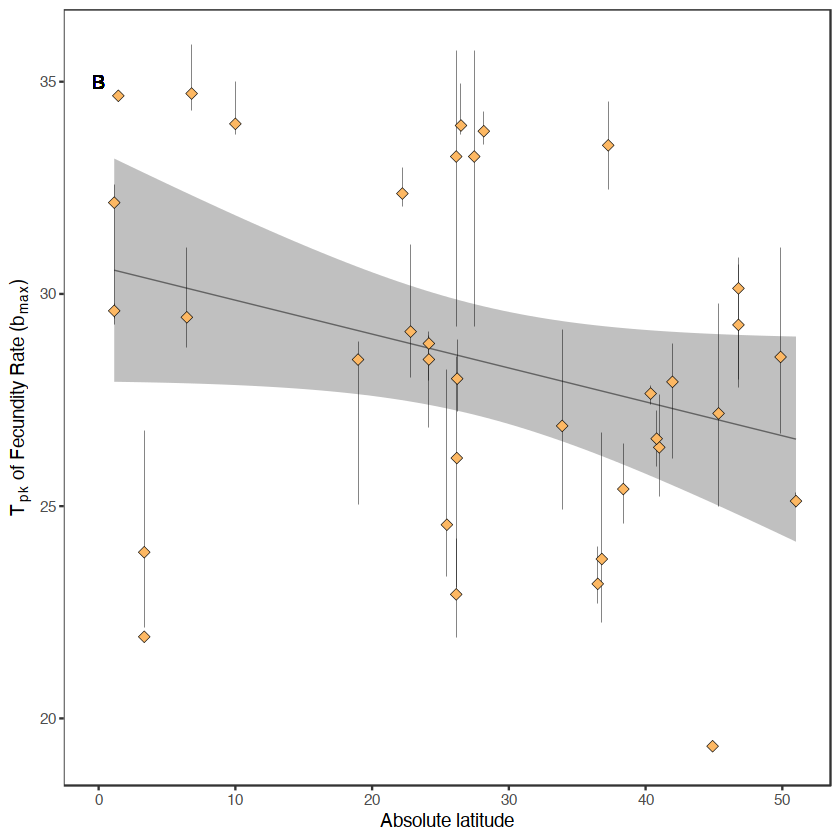

In [45]:
bmax_T_pklat_plot <-
  bmaxLat_data %>%
  ggplot(aes(x= abs(latitude), y = T_pk))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill='#636363')+
  geom_linerange(aes(ymin =T_pkLwr , ymax = T_pkUpr),size= 0.1,col="#000000")+
  scale_y_continuous(expression(paste(italic(T[pk]), " of Fecundity Rate (", italic(b[max]),")")))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_point(size = 2.5,stroke=0.2, col = '#000000', fill="#fdb863", shape=23)+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(legend.position = 'none',legend.text = element_text(size = 10),
       panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 0, y = 35, label = "B"), 
            parse = TRUE, size = 4, colour = "black")


bmax_T_pklat_plot

In [46]:
bmax_T_pklatmodel <- lm( T_pk ~ latitude, data = bmaxLat_data)
summary(bmax_T_pklatmodel)
anova(bmax_T_pklatmodel)


Call:
lm(formula = T_pk ~ latitude, data = bmaxLat_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6455 -1.0895  0.2025  2.0693  6.3346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.28907    0.82595   36.67  < 2e-16 ***
latitude    -0.08379    0.02635   -3.18  0.00314 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.548 on 34 degrees of freedom
Multiple R-squared:  0.2292,	Adjusted R-squared:  0.2065 
F-statistic: 10.11 on 1 and 34 DF,  p-value: 0.003138


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
latitude,1,127.2925,127.29250,10.11094,0.003138023
Residuals,34,428.0456,12.58958,NA,NA


## Relationship of $T_{pk}$ of $z_J$ vs latitude


In [47]:
##### Relationship of $T_{pk}$ of $z_J$ vs latitude #####

zJLat <- as_tibble(read_csv('../data/TraitData.csv')) %>%
                rename(species = interactor1) %>%
                filter(standardisedtraitname == 'zj' & latitude != 'NA') %>%
                distinct(species, latitude)

zJMass <- as_tibble(read_csv('../data/zj_pksT_pksMass.csv'))  %>% 
                select(-curve_ID)

head(zJLat)

head(zJMass)

zJLat_data <- zJMass %>% inner_join(zJLat) %>%
                    mutate(z_JmassCor = zjpk/mass^-0.193)

head(zJLat_data)

Rows: 1292 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 26 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zjpk, zjpkLwr, zjpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,latitude
<chr>,<dbl>
Acyrthosiphon pisum,36.500000
Paracoccus marginatus,25.468722
Bemisia tabaci,-6.800000
Anopheles gambiae,6.455027
Clavigralla tomentosicollis,6.450300
Tetranychus urticae,35.709686


zjpk,zjpkLwr,zjpkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.029456767,0.030918251,0.027987083,Thrips hawaiiensis,21.612,21.07361,22.078428,0.040000
0.012854225,0.014949619,0.010758487,Bemisia tabaci,18.811,14.85609,20.538151,0.293125
0.009328441,0.012357726,0.008243967,Tetraneura nigriabdominalis,33.051,26.08720,33.279129,0.867300
0.016435073,0.018674420,0.015077366,Stethorus punctillum,16.481,15.43676,18.154428,0.480000
0.012468080,0.014499134,0.010818557,Tetranychus urticae,8.927,8.83500,8.943365,0.024300
0.002361097,0.003194127,0.002218910,Planococcus citri,12.715,12.83251,15.454693,1.890000


Joining, by = "species"


zjpk,zjpkLwr,zjpkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass,latitude,z_JmassCor
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.029456767,0.030918251,0.027987083,Thrips hawaiiensis,21.612,21.07361,22.078428,0.040000,26.15000,0.015826419
0.012854225,0.014949619,0.010758487,Bemisia tabaci,18.811,14.85609,20.538151,0.293125,-6.80000,0.010143483
0.009328441,0.012357726,0.008243967,Tetraneura nigriabdominalis,33.051,26.08720,33.279129,0.867300,24.15000,0.009075608
0.016435073,0.018674420,0.015077366,Stethorus punctillum,16.481,15.43676,18.154428,0.480000,46.79110,0.014264324
0.012468080,0.014499134,0.010818557,Tetranychus urticae,8.927,8.83500,8.943365,0.024300,35.70969,0.006084454
0.002361097,0.003194127,0.002218910,Planococcus citri,12.715,12.83251,15.454693,1.890000,36.80000,0.002669752


In [48]:
zJ_T_pklatmodel <- lm( T_pk ~ latitude, data = zJLat_data)
summary(zJ_T_pklatmodel)
anova(zJ_T_pklatmodel)


Call:
lm(formula = T_pk ~ latitude, data = zJLat_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1011  -2.9489   0.2508   2.6714  14.0552 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.928264   1.908999   9.915  5.8e-10 ***
latitude     0.002797   0.052567   0.053    0.958    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.715 on 24 degrees of freedom
Multiple R-squared:  0.0001179,	Adjusted R-squared:  -0.04154 
F-statistic: 0.00283 on 1 and 24 DF,  p-value: 0.958


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
latitude,1,0.09244938,0.09244938,0.002830324,0.9580123
Residuals,24,783.93327165,32.66388632,NA,NA


`geom_smooth()` using formula 'y ~ x'



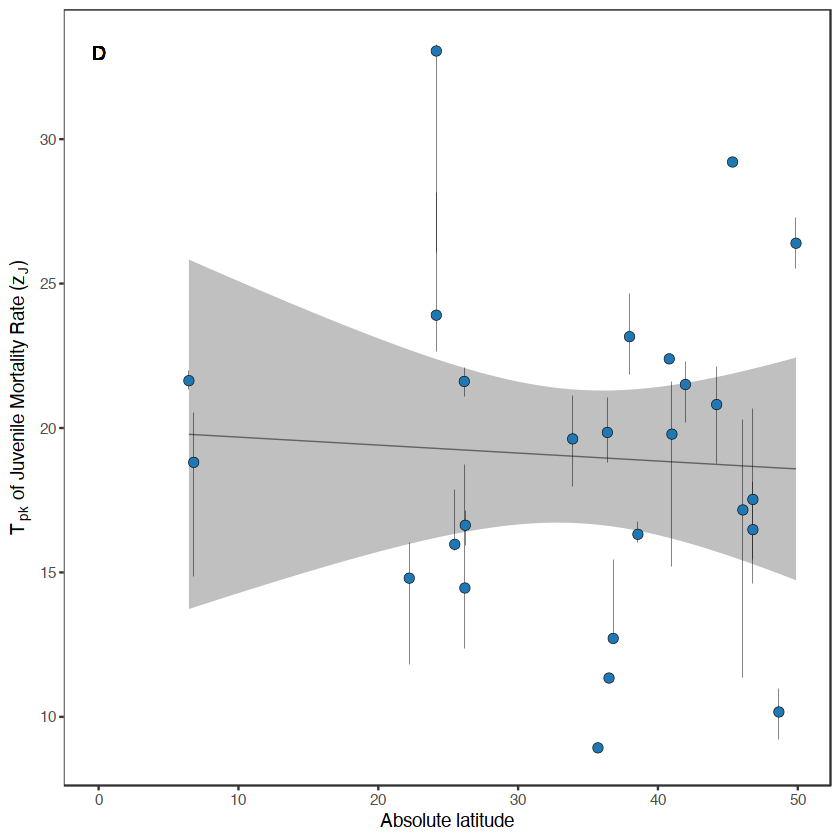

In [49]:
zJ_T_pklat_plot <-
  zJLat_data %>%
  ggplot(aes(x= abs(latitude), y = T_pk)) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill='#636363')+
  scale_y_continuous(expression(paste(italic(T[pk]), " of Juvenile Mortality Rate (", italic(z[J]),")")))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_linerange(aes(ymin =T_pkLwr , ymax = T_pkUpr),size= 0.1,col="#000000")+
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape = 21, fill="#1f78b4")+
  theme_bw()+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 0, y = 33,label = "D"), 
            parse = TRUE, size = 4, colour = "black")

zJ_T_pklat_plot

## Relationship of $T_{pk}$ of $z$ vs latitude

In [50]:
##### Relationship of $T_{pk}$ of $z$ vs latitude #####

zLat <- as_tibble(read_csv('../data/TraitData.csv')) %>%
                rename(species = interactor1) %>%
                filter(standardisedtraitname == 'z' & latitude != 'NA') %>%
                distinct(species, latitude)

zMass <- as_tibble(read_csv('../data/z_pksT_pksMass.csv'))  %>% 
                select(-curve_ID)
                

head(zLat)

head(zMass)

zLat_data <- zMass %>% inner_join(zLat) %>%
                    mutate(zmassCor = zpk/mass^-0.124)

head(zLat_data)

Rows: 1292 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 28 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zpk, zpkLwr, zpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,latitude
<chr>,<dbl>
Acyrthosiphon pisum,36.500000
Paracoccus marginatus,25.468722
Bemisia tabaci,-6.800000
Antestiopsis thunbergii,-3.334883
Monochamus leuconotus,-3.334883
Anopheles gambiae,6.455027


zpk,zpkLwr,zpkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0.005623539,0.006957812,0.004543908,Culex pipiens,16.806,16.706000,16.838873,2.9200000
0.021540255,0.026664929,0.019476293,Paracoccus marginatus,15.827,15.595741,18.274606,3.3650000
0.025069042,0.026753578,0.018624273,Acyrthosiphon pisum,8.256,5.698628,9.049972,2.3650000
0.032803103,0.033864906,0.032307552,Aphis gossypii,11.278,11.054683,11.495692,0.6633333
0.001882355,0.002149256,0.001631707,Tribolium castaneum,26.472,25.591923,27.063000,2.1437500
0.027919601,0.031046098,0.026301978,Tetranychus mcdanieli,15.794,14.360494,16.770674,0.0243000


Joining, by = "species"


zpk,zpkLwr,zpkUpr,species,T_pk,T_pkLwr,T_pkUpr,mass,latitude,zmassCor
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.005623539,0.006957812,0.004543908,Culex pipiens,16.806,16.706000,16.838873,2.9200000,39.00000,0.006422693
0.021540255,0.026664929,0.019476293,Paracoccus marginatus,15.827,15.595741,18.274606,3.3650000,25.46872,0.025037847
0.025069042,0.026753578,0.018624273,Acyrthosiphon pisum,8.256,5.698628,9.049972,2.3650000,36.50000,0.027892845
0.032803103,0.033864906,0.032307552,Aphis gossypii,11.278,11.054683,11.495692,0.6633333,33.90000,0.031175231
0.001882355,0.002149256,0.001631707,Tribolium castaneum,26.472,25.591923,27.063000,2.1437500,37.96897,0.002069032
0.027919601,0.031046098,0.026301978,Tetranychus mcdanieli,15.794,14.360494,16.770674,0.0243000,46.79110,0.017608582


In [51]:
z_T_pklatmodel <- lm( T_pk ~ latitude, data = zLat_data)
summary(z_T_pklatmodel)
anova(z_T_pklatmodel)


Call:
lm(formula = T_pk ~ latitude, data = zLat_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8651 -2.0567 -0.7644  1.5892  9.7658 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.45114    1.36188  13.548 2.72e-13 ***
latitude    -0.03644    0.04331  -0.841    0.408    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.902 on 26 degrees of freedom
Multiple R-squared:  0.0265,	Adjusted R-squared:  -0.01094 
F-statistic: 0.7078 on 1 and 26 DF,  p-value: 0.4078


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
latitude,1,17.00638,17.00638,0.7078457,0.4078317
Residuals,26,624.66427,24.02555,NA,NA


`geom_smooth()` using formula 'y ~ x'



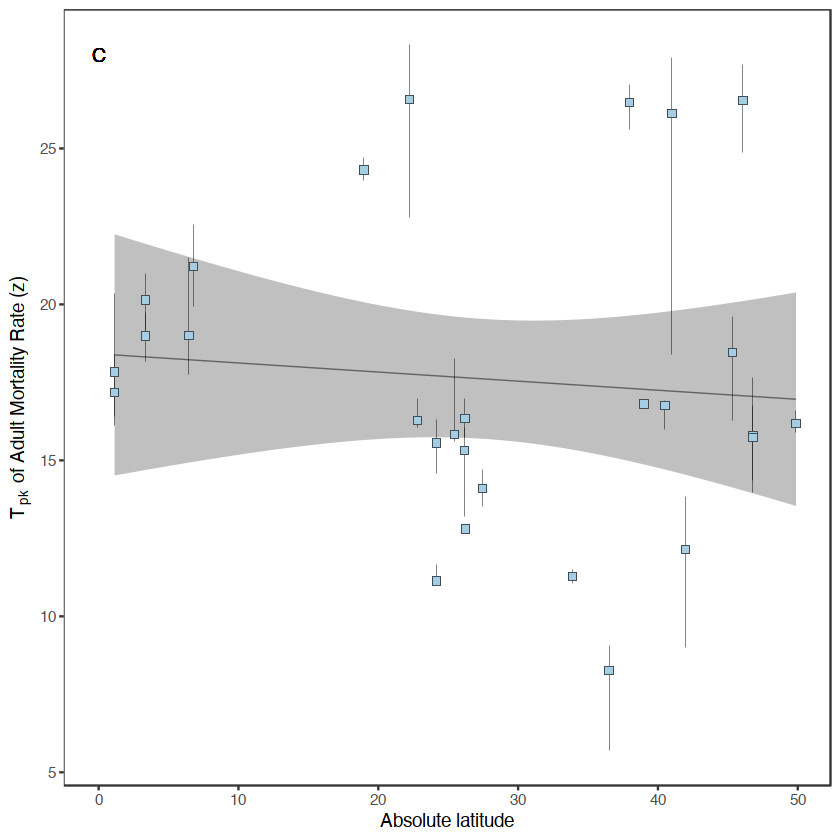

In [52]:
z_T_pklat_plot <-
  zLat_data %>%
  ggplot(aes(x= abs(latitude), y = T_pk))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill='#636363')+
  scale_y_continuous(expression(paste(italic(T[pk]), " of Adult Mortality Rate (", italic(z),")")))+
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  geom_linerange(aes(ymin =T_pkLwr , ymax = T_pkUpr),size= 0.1,col="#000000")+
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape=22, fill ="#a6cee3")+
  theme_bw()+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 0, y = 28,label = "C"), 
            parse = TRUE, size = 4, colour = "black")
z_T_pklat_plot

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



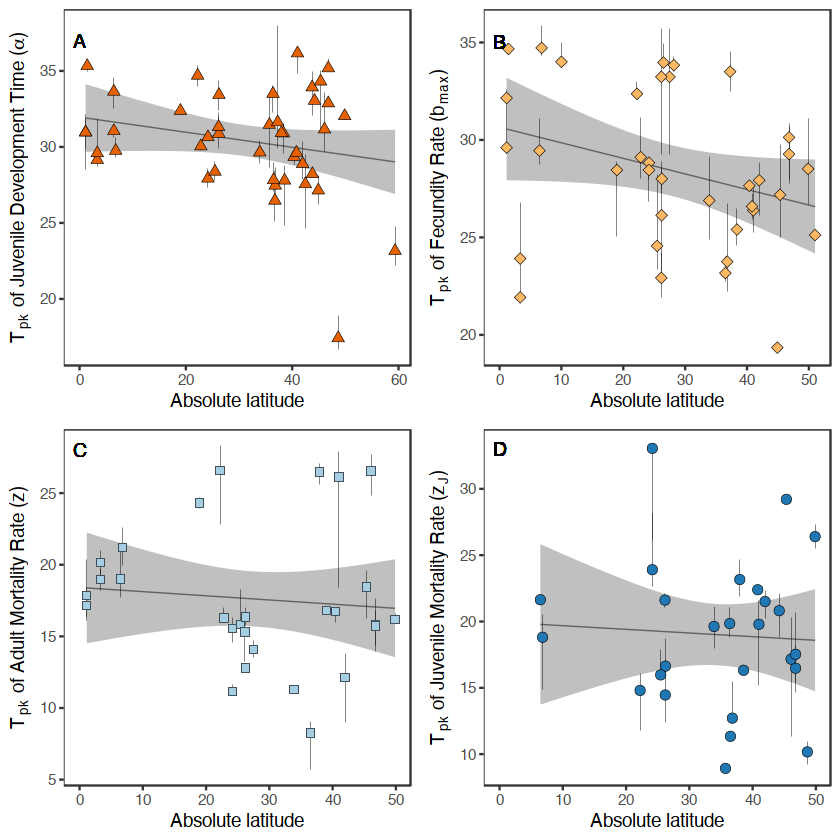

In [53]:
#plot 4x4 panel 

p1 <- ggarrange(a_T_pklat_plot, bmax_T_pklat_plot, z_T_pklat_plot, zJ_T_pklat_plot, nrow=2, ncol=2)

p1

ggsave("../results/SI/Traits_Lat_Adapt.pdf", p1, height=15, width = 17, units="cm", device = cairo_pdf)

## Relationship of $T_{pk}$ of $\alpha$ vs Rearing Temperature

In [54]:
#### Relationship of $T_{pk}$ of $\alpha$ vs Rearing Temperature #### 

RearDF <- as_tibble(read_csv('../data/TraitData.csv')) %>% 
          select(standardisedtraitname,interactor1,interactor1growthtemp) %>%
          filter(interactor1growthtemp != 'not stated' & 
                 interactor1growthtemp != 'various' & interactor1growthtemp != 'NA' ) %>%
          rename(trait = standardisedtraitname, species = interactor1, RearTemp = interactor1growthtemp) %>%
          mutate(RearTemp = as.numeric(RearTemp))

# RearDF %>% distinct(species) %>% print(n=60)

Rows: 1292 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [55]:
RearAlpha <- RearDF %>% filter(trait == '1/alpha') %>% 
             group_by(species) %>% 
             summarise(avg = mean(RearTemp)) %>%
             arrange(avg) %>%
             mutate(Rcurve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                            species == 'Anthonomus grandis' ~ '2',
                            species == 'Paracoccus marginatus' ~ '3',
                            species == 'Acyrthosiphon pisum' ~ '4',
                            species == 'Harmonia axyridis' ~ '10',
                            species == 'Tribolium castaneum' ~ '6',
                            species == 'Aedes krombeini' ~ '7',
                            species == 'Tetraneura nigriabdominalis' ~ '12',
                            species == 'Stethorus punctillum' ~ '14',
                            species == 'Tetranychus mcdanieli' ~ '15',
                            species == 'Tetranychus urticae' ~ '16',
                            species == 'Harmonia axyridis' ~ '10',
                            species == 'Planococcus citri' ~ '11',
                            species == 'Muscidifurax zaraptor' ~ '9',
                            species == 'Aphis nasturtii' ~ '8',
                            species == 'Rhopalosiphum maidis' ~ '5',
                            species == 'Anopheles gambiae' ~ '20',
                            species == 'Amblyseius womersleyi' ~ '17',
                            species == 'Macrocentrus iridescens' ~ '18',
                            species == 'Otiorhynchus sulcatus' ~ '19',
                            species == 'Drosophila suzukii' ~ '20',
                            species == 'Gastrolina depressa' ~ '21',
                            species == 'Aubeonymus mariaefranciscae' ~ '22',
                            species == 'Iphiseius degenerans' ~ '23',
                            species == 'Amblyseius swirskii' ~ '24',
                            species == 'Macrosiphum euphorbia' ~ '25',
                            species == 'Myzus persicae' ~ '26',
                            #species == 'Tetranychus evansi' ~ '27',
                            species == 'Helicoverpa armigera' ~ '28',
                            species == 'Antestiopsis thunbergii' ~ '29',
                            species == 'Monochamus leuconotus' ~ '30',
                            species == 'Kampimodromus aberrans' ~ '31',
                            species == 'Phenacoccus solenopsis' ~ '32',
                            species == 'Leptinotarsa decemlineata' ~ '33',
                            species == 'Thrips hawaiiensis' ~ '34')) %>%
                            arrange(Rcurve_ID) %>% 
                rename(Rspecies = species, RTemp = avg)

head(RearAlpha)

Rspecies,RTemp,Rcurve_ID
<chr>,<dbl>,<chr>
Aedes albopictus,25.5,1
Harmonia axyridis,22.0,10
Planococcus citri,26.0,11
Tetraneura nigriabdominalis,25.0,12
Stethorus punctillum,24.0,14
Tetranychus mcdanieli,24.0,15


In [56]:
alpha <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv', header = TRUE)) %>%
           filter(param == 'topt') %>% 
           select(species, estimate, conf_lower, conf_upper, trait) %>%
           mutate(curve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                               species == 'Anthonomus grandis' ~ '2',
                               species == 'Paracoccus marginatus' ~ '3',
                               species == 'Acyrthosiphon pisum' ~ '4',
                               species == 'Harmonia axyridis' ~ '10',
                               species == 'Tribolium castaneum' ~ '6',
                               species == 'Aedes krombeini' ~ '7',
                               species == 'Tetraneura nigriabdominalis' ~ '12',
                               species == 'Stethorus punctillum' ~ '14',
                               species == 'Tetranychus mcdanieli' ~ '15',
                               species == 'Tetranychus urticae' ~ '16',
                               species == 'Harmonia axyridis' ~ '10',
                               species == 'Planococcus citri' ~ '11',
                               species == 'Muscidifurax zaraptor' ~ '9',
                               species == 'Aphis nasturtii' ~ '8',
                               species == 'Rhopalosiphum maidis' ~ '5',
                               species == 'Anopheles gambiae' ~ '20',
                               species == 'Amblyseius womersleyi' ~ '17',
                               species == 'Macrocentrus iridescens' ~ '18',
                               species == 'Otiorhynchus sulcatus' ~ '19',
                               species == 'Drosophila suzukii' ~ '20',
                               species == 'Gastrolina depressa' ~ '21',
                               species == 'Aubeonymus mariaefranciscae' ~ '22',
                               species == 'Iphiseius degenerans' ~ '23',
                               species == 'Amblyseius swirskii' ~ '24',
                               species == 'Macrosiphum euphorbia' ~ '25',
                               species == 'Myzus persicae' ~ '26',
                               #species == 'Tetranychus evansi' ~ '27',
                               species == 'Helicoverpa armigera' ~ '28',
                               species == 'Antestiopsis thunbergii' ~ '29',
                               species == 'Monochamus leuconotus' ~ '30',
                               species == 'Kampimodromus aberrans' ~ '31',
                               species == 'Phenacoccus solenopsis' ~ '32',
                               species == 'Leptinotarsa decemlineata' ~ '33',
                               species == 'Thrips hawaiiensis' ~ '34')) %>%
              arrange(curve_ID) %>% filter(curve_ID != 'NA')

head(alpha)

species,estimate,conf_lower,conf_upper,trait,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Aedes albopictus,31.160,29.71966,33.57167,juvenile development rate,1
Harmonia axyridis,33.041,32.88544,33.26471,juvenile development rate,10
Planococcus citri,27.462,26.94932,28.64600,juvenile development rate,11
Tetraneura nigriabdominalis,30.648,30.55200,30.78080,juvenile development rate,12
Stethorus punctillum,32.875,32.76915,32.97900,juvenile development rate,14
Tetranychus mcdanieli,35.182,34.96051,35.80812,juvenile development rate,15


In [57]:
RearAlpha <- bind_cols(alpha, RearAlpha)

head(RearAlpha)

species,estimate,conf_lower,conf_upper,trait,curve_ID,Rspecies,RTemp,Rcurve_ID
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
Aedes albopictus,31.160,29.71966,33.57167,juvenile development rate,1,Aedes albopictus,25.5,1
Harmonia axyridis,33.041,32.88544,33.26471,juvenile development rate,10,Harmonia axyridis,22.0,10
Planococcus citri,27.462,26.94932,28.64600,juvenile development rate,11,Planococcus citri,26.0,11
Tetraneura nigriabdominalis,30.648,30.55200,30.78080,juvenile development rate,12,Tetraneura nigriabdominalis,25.0,12
Stethorus punctillum,32.875,32.76915,32.97900,juvenile development rate,14,Stethorus punctillum,24.0,14
Tetranychus mcdanieli,35.182,34.96051,35.80812,juvenile development rate,15,Tetranychus mcdanieli,24.0,15


In [58]:
RAlp_model <- lm(estimate ~ RTemp, RearAlpha); summary(RAlp_model)


Call:
lm(formula = estimate ~ RTemp, data = RearAlpha)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7786 -2.1928  0.0302  2.0202  6.1462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  16.5647     7.6651   2.161   0.0385 *
RTemp         0.5381     0.3086   1.744   0.0911 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.009 on 31 degrees of freedom
Multiple R-squared:  0.08933,	Adjusted R-squared:  0.05996 
F-statistic: 3.041 on 1 and 31 DF,  p-value: 0.0911


`geom_smooth()` using formula 'y ~ x'



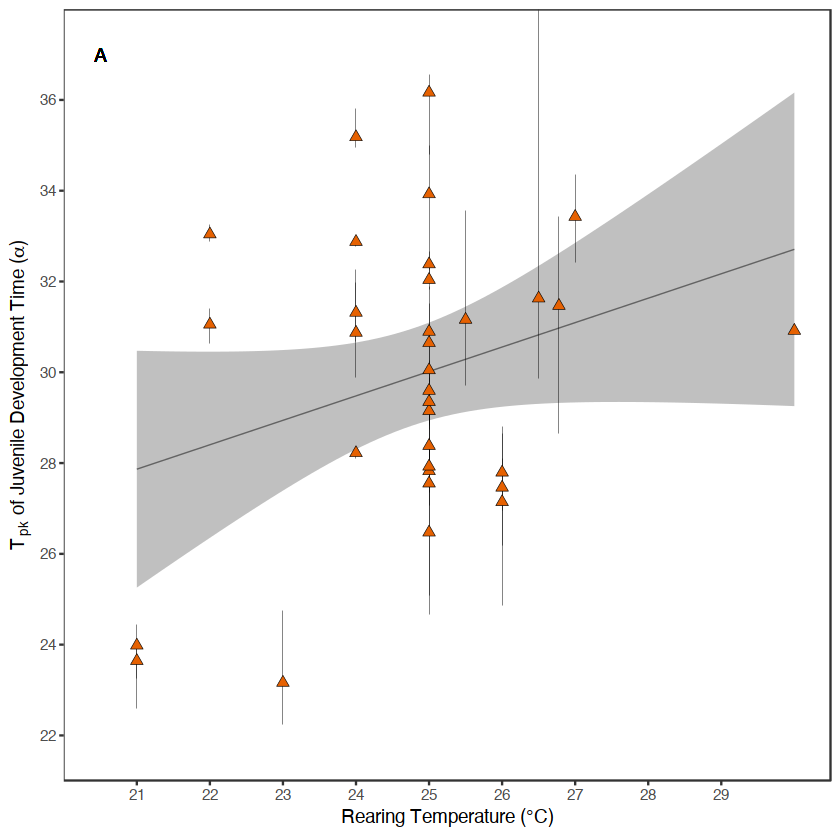

In [59]:
Rear_alp <- ggplot(RearAlpha, aes(x=RTemp, y=estimate)) +
      geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill='#636363')+
      geom_linerange(aes(ymin =conf_lower , ymax = conf_upper),size= 0.1,col="#000000") +
      geom_point(size = 2.5,stroke=0.2, col = '#000000', shape=24, fill ='#e66101')+
      theme_bw()+
      scale_x_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)"))),
                    limits =c(20,30.5),
                    expand = c(0, 0),
                    breaks=seq(21,29, by=1))+
      scale_y_continuous(expression(paste(italic(T[pk]), " of Juvenile Development Time (", italic(alpha),")")),
                     limits =c(21,38),
                     expand = c(0, 0),
                     breaks=seq(22,36, by=2))+
      theme(legend.position = 'none',legend.text = element_text(size = 10))+
      theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
      geom_text(aes(x = 20.5, y = 37,label = "A"), 
                parse = TRUE, size = 4, colour = "black")

Rear_alp

## Relationship of $T_{pk}$ of $b_{max}$ vs Rearing Temperature

In [60]:
####### Relationship of $T_{pk}$ of $b_{max}$ vs Rearing Temperature #######

RearDF <- as_tibble(read_csv('../data/TraitData.csv')) %>% 
  select(standardisedtraitname,interactor1,interactor1growthtemp) %>%
  filter(interactor1growthtemp != 'not stated' & 
           interactor1growthtemp != 'various' & interactor1growthtemp != 'NA' ) %>%
  rename(trait = standardisedtraitname, species = interactor1, RearTemp = interactor1growthtemp) %>%
  mutate(RearTemp = as.numeric(RearTemp))

Rearbmax <- RearDF %>% filter(trait == 'bmax') %>% 
  group_by(species) %>% 
  summarise(avg = mean(RearTemp)) %>%
  arrange(avg) %>%
  mutate(Rcurve_ID = case_when(species == 'Plutella xylostella' ~ '1',
                               species == 'Drosophila suzukii' ~ '2',
                               species == 'Paracoccus marginatus' ~ '3',
                               species == 'Acyrthosiphon pisum' ~ '4',
                               species == 'Tetraneura nigriabdominalis' ~ '5',
                               species == 'Stethorus punctillum' ~ '6',
                               species == 'Tetranychus mcdanieli' ~ '7',
                               species == 'Muscidifurax zaraptor' ~ '8',
                               species == 'Aphis nasturtii' ~ '9',
                               species == 'Rhopalosiphum maidis' ~ '10',
                               species == 'Hylobius transversovittatus' ~ '11',
                               species == 'Helicoverpa armigera' ~ '12',
                               species == 'Antestiopsis thunbergii' ~ '13',
                               species == 'Monochamus leuconotus' ~ '14',
                               species == 'Culex pipiens' ~ '15',
                               species == 'Phenacoccus solenopsis' ~ '16',
                               species == 'Culex quinquefasciatus' ~ '17',
                               species == 'Thrips hawaiiensis' ~ '18',
                               species == 'Iphiseius degenerans' ~ '19',
                               species == 'Kampimodromus aberrans' ~ '20',
                               species == 'Planococcus citri' ~ '21',
                               species == 'Amblyseius womersleyi' ~ '22',    
                               species == 'Anthonomus grandis'   ~ '23',      
                               species == 'Callosobruchus analis'  ~ '24',    
                               species == 'Callosobruchus chinensis' ~ '25',  
                               species == 'Callosobruchus maculatus'  ~ '26', 
                               species == 'Callosobruchus rhodesianus' ~ '27',
                               species == 'Aedes krombeini' ~ '29')) %>%
  arrange(Rcurve_ID) %>% rename(Rspecies = species, RTemp = avg) %>%
  filter(Rcurve_ID != 'NA')

# Rearbmax %>% distinct(Rspecies, Rcurve_ID) %>% print(n=60)

head(Rearbmax)

Rows: 1292 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rspecies,RTemp,Rcurve_ID
<chr>,<dbl>,<chr>
Plutella xylostella,23.33333,1
Rhopalosiphum maidis,25.00000,10
Hylobius transversovittatus,25.00000,11
Helicoverpa armigera,25.00000,12
Antestiopsis thunbergii,25.00000,13
Monochamus leuconotus,25.00000,14


In [61]:
bmax  <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv', header = TRUE)) %>%
  filter(param == 'topt') %>% 
  select(species, estimate, conf_lower, conf_upper, trait) %>%
  mutate(curve_ID = case_when(species == 'Plutella xylostella' ~ '1',
                               species == 'Drosophila suzukii' ~ '2',
                               species == 'Paracoccus marginatus' ~ '3',
                               species == 'Acyrthosiphon pisum' ~ '4',
                               species == 'Tetraneura nigriabdominalis' ~ '5',
                               species == 'Stethorus punctillum' ~ '6',
                               species == 'Tetranychus mcdanieli' ~ '7',
                               species == 'Muscidifurax zaraptor' ~ '8',
                               species == 'Aphis nasturtii' ~ '9',
                               species == 'Rhopalosiphum maidis' ~ '10',
                               species == 'Hylobius transversovittatus' ~ '11',
                               species == 'Helicoverpa armigera' ~ '12',
                               species == 'Antestiopsis thunbergii' ~ '13',
                               species == 'Monochamus leuconotus' ~ '14',
                               species == 'Culex pipiens' ~ '15',
                               species == 'Phenacoccus solenopsis' ~ '16',
                               species == 'Culex quinquefasciatus' ~ '17',
                               species == 'Thrips hawaiiensis' ~ '18',
                               species == 'Iphiseius degenerans' ~ '19',
                               species == 'Kampimodromus aberrans' ~ '20',
                               species == 'Planococcus citri' ~ '21',
                               species == 'Amblyseius womersleyi' ~ '22',    
                               species == 'Anthonomus grandis'   ~ '23',      
                               species == 'Callosobruchus analis'  ~ '24',    
                               species == 'Callosobruchus chinensis' ~ '25',  
                               species == 'Callosobruchus maculatus'  ~ '26', 
                               species == 'Callosobruchus rhodesianus' ~ '27',
                               species == 'Aedes krombeini' ~ '29')) %>%
  arrange(curve_ID) %>% 
  filter(curve_ID != 'NA')


# bmax %>% distinct(species) %>% print(n=30)

head(bmax)

species,estimate,conf_lower,conf_upper,trait,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Plutella xylostella,33.237,29.23068,35.73300,fecundity rate,1
Rhopalosiphum maidis,28.456,26.84300,29.02608,fecundity rate,10
Hylobius transversovittatus,25.120,24.96835,25.31557,fecundity rate,11
Helicoverpa armigera,26.386,25.23430,27.63622,fecundity rate,12
Antestiopsis thunbergii,21.923,21.85640,21.99806,fecundity rate,13
Monochamus leuconotus,23.915,22.14629,26.79050,fecundity rate,14


In [62]:
Rearbmax <- bind_cols(bmax,Rearbmax)

head(Rearbmax)

species,estimate,conf_lower,conf_upper,trait,curve_ID,Rspecies,RTemp,Rcurve_ID
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
Plutella xylostella,33.237,29.23068,35.73300,fecundity rate,1,Plutella xylostella,23.33333,1
Rhopalosiphum maidis,28.456,26.84300,29.02608,fecundity rate,10,Rhopalosiphum maidis,25.00000,10
Hylobius transversovittatus,25.120,24.96835,25.31557,fecundity rate,11,Hylobius transversovittatus,25.00000,11
Helicoverpa armigera,26.386,25.23430,27.63622,fecundity rate,12,Helicoverpa armigera,25.00000,12
Antestiopsis thunbergii,21.923,21.85640,21.99806,fecundity rate,13,Antestiopsis thunbergii,25.00000,13
Monochamus leuconotus,23.915,22.14629,26.79050,fecundity rate,14,Monochamus leuconotus,25.00000,14


In [63]:
Rbmax_model <- lm(estimate ~ RTemp, Rearbmax); summary(Rbmax_model)


Call:
lm(formula = estimate ~ RTemp, data = Rearbmax)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7652 -2.4570  0.8524  2.1468  9.1899 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -23.8430    14.3742  -1.659  0.11018   
RTemp         2.0524     0.5703   3.599  0.00144 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.43 on 24 degrees of freedom
Multiple R-squared:  0.3505,	Adjusted R-squared:  0.3234 
F-statistic: 12.95 on 1 and 24 DF,  p-value: 0.001443


`geom_smooth()` using formula 'y ~ x'



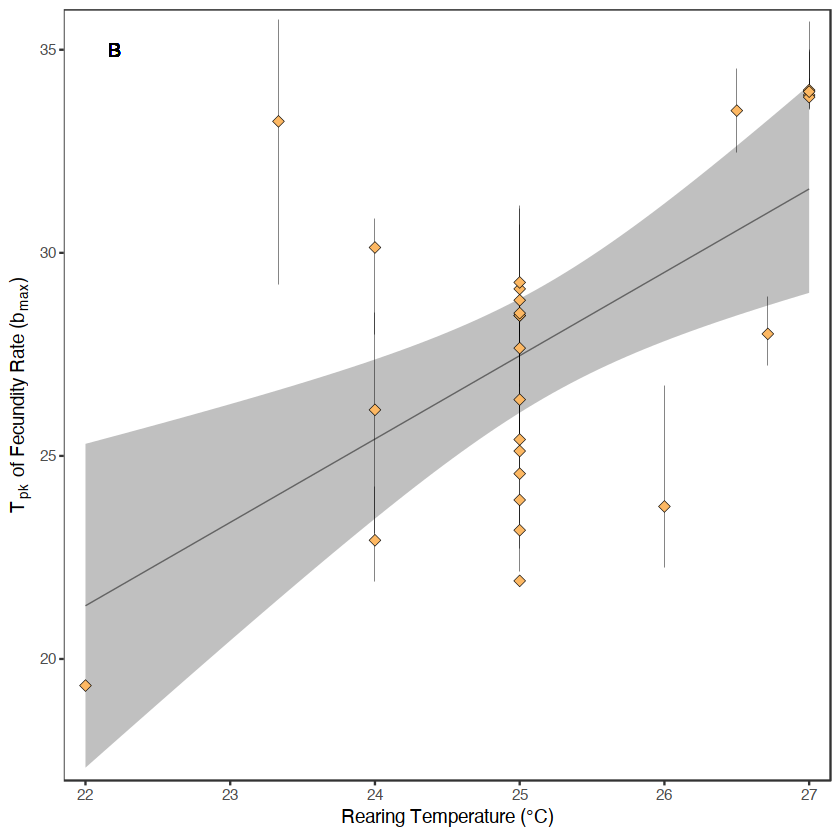

In [64]:
Rear_bmax <- ggplot(Rearbmax, aes(x=RTemp, y=estimate)) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill='#636363') +
  geom_linerange(aes(ymin =conf_lower , ymax = conf_upper),size= 0.1,col="#000000") +
  geom_point(size = 2.5,stroke=0.2, col = '#000000', fill="#fdb863", shape=23)+
  theme_bw()+
  scale_x_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)"))),
                     limits =c(21.85,27.15),
                     expand = c(0, 0),
                     breaks=seq(22,27, by=1))+
  scale_y_continuous(expression(paste(italic(T[pk]), " of Fecundity Rate (", italic(b[max]),")")),
                     limits =c(17,36),
                     expand = c(0, 0),
                     breaks=seq(15,35, by=5))+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 22.2, y = 35, label = "B"), 
            parse = TRUE, size = 4, colour = "black")

Rear_bmax

## Relationship of $T_{pk}$ of $z_J$ vs Rearing Temperature

In [65]:
RearDF <- as_tibble(read_csv('../data/TraitData.csv')) %>% 
  select(standardisedtraitname,interactor1,interactor1growthtemp) %>%
  filter(interactor1growthtemp != 'not stated' & 
           interactor1growthtemp != 'various' & interactor1growthtemp != 'NA' ) %>%
  rename(trait = standardisedtraitname, species = interactor1, RearTemp = interactor1growthtemp) %>%
  mutate(RearTemp = as.numeric(RearTemp))

RearZetaJ <- RearDF %>% filter(trait == 'zj') %>% 
  group_by(species) %>% 
  summarise(avg = mean(RearTemp)) %>%
  arrange(avg) %>%
  mutate(Rcurve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                               species == 'Anthonomus grandis' ~ '2',
                               species == 'Paracoccus marginatus' ~ '3',
                               species == 'Acyrthosiphon pisum' ~ '4',
                               species == 'Harmonia axyridis' ~ '10',
                               species == 'Tribolium castaneum' ~ '6',
                               #species == 'Aedes krombeini' ~ '7',
                               species == 'Tetraneura nigriabdominalis' ~ '12',
                               species == 'Stethorus punctillum' ~ '14',
                               species == 'Tetranychus mcdanieli' ~ '15',
                               species == 'Tetranychus urticae' ~ '16',
                               species == 'Planococcus citri' ~ '11',
                               species == 'Muscidifurax zaraptor' ~ '9',
                               species == 'Aphis nasturtii' ~ '8',
                               species == 'Rhopalosiphum maidis' ~ '5',
                               species == 'Anopheles gambiae' ~ '20',
                               #species == 'Amblyseius womersleyi' ~ '17',
                               #species == 'Macrocentrus iridescens' ~ '18',
                               #species == 'Otiorhynchus sulcatus' ~ '19',
                               #species == 'Drosophila suzukii' ~ '20',
                               #species == 'Gastrolina depressa' ~ '21',
                               species == 'Aubeonymus mariaefranciscae' ~ '22',
                               #species == 'Iphiseius degenerans' ~ '23',
                               #species == 'Amblyseius swirskii' ~ '24',
                               #species == 'Macrosiphum euphorbia' ~ '25',
                               #species == 'Myzus persicae' ~ '26',
                               #species == 'Tetranychus evansi' ~ '27',
                               species == 'Helicoverpa armigera' ~ '28',
                               species == 'Antestiopsis thunbergii' ~ '29',
                               #species == 'Monochamus leuconotus' ~ '30',
                               #species == 'Kampimodromus aberrans' ~ '31',
                               #species == 'Phenacoccus solenopsis' ~ '32',
                               #species == 'Leptinotarsa decemlineata' ~ '33',
                               species == 'Thrips hawaiiensis' ~ '34')) %>%
  arrange(Rcurve_ID) %>% rename(Rspecies = species, RTemp = avg) %>%
  filter(Rcurve_ID != 'NA')

# RearZetaJ %>% distinct(Rspecies,Rcurve_ID) %>% print(n=60)
head(RearZetaJ)

Rows: 1292 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rspecies,RTemp,Rcurve_ID
<chr>,<dbl>,<chr>
Aedes albopictus,25.00000,1
Harmonia axyridis,22.00000,10
Planococcus citri,25.66667,11
Tetraneura nigriabdominalis,25.00000,12
Stethorus punctillum,24.00000,14
Tetranychus mcdanieli,24.00000,15


In [66]:
zetaJ <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv', header = TRUE)) %>%
  filter(param == 'topt') %>% 
  select(species, estimate, conf_lower, conf_upper, trait) %>%
  mutate(curve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                              species == 'Anthonomus grandis' ~ '2',
                              species == 'Paracoccus marginatus' ~ '3',
                              species == 'Acyrthosiphon pisum' ~ '4',
                              species == 'Harmonia axyridis' ~ '10',
                              species == 'Tribolium castaneum' ~ '6',
                              #species == 'Aedes krombeini' ~ '7',
                              species == 'Tetraneura nigriabdominalis' ~ '12',
                              species == 'Stethorus punctillum' ~ '14',
                              species == 'Tetranychus mcdanieli' ~ '15',
                              species == 'Tetranychus urticae' ~ '16',
                              species == 'Planococcus citri' ~ '11',
                              species == 'Muscidifurax zaraptor' ~ '9',
                              species == 'Aphis nasturtii' ~ '8',
                              species == 'Rhopalosiphum maidis' ~ '5',
                              species == 'Anopheles gambiae' ~ '20',
                              #species == 'Amblyseius womersleyi' ~ '17',
                              #species == 'Macrocentrus iridescens' ~ '18',
                              #species == 'Otiorhynchus sulcatus' ~ '19',
                              #species == 'Drosophila suzukii' ~ '20',
                              #species == 'Gastrolina depressa' ~ '21',
                              species == 'Aubeonymus mariaefranciscae' ~ '22',
                              #species == 'Iphiseius degenerans' ~ '23',
                              #species == 'Amblyseius swirskii' ~ '24',
                              #species == 'Macrosiphum euphorbia' ~ '25',
                              #species == 'Myzus persicae' ~ '26',
                              #species == 'Tetranychus evansi' ~ '27',
                              species == 'Helicoverpa armigera' ~ '28',
                              species == 'Antestiopsis thunbergii' ~ '29',
                              #species == 'Monochamus leuconotus' ~ '30',
                              #species == 'Kampimodromus aberrans' ~ '31',
                              #species == 'Phenacoccus solenopsis' ~ '32',
                              #species == 'Leptinotarsa decemlineata' ~ '33',
                              species == 'Thrips hawaiiensis' ~ '34')) %>%
  arrange(curve_ID) %>% filter(curve_ID != 'NA')

# zetaJ %>% distinct(species,curve_ID) %>% print(n=30)

In [67]:
RearZetaJ <- bind_cols(zetaJ,RearZetaJ)

head(RearZetaJ)

species,estimate,conf_lower,conf_upper,trait,curve_ID,Rspecies,RTemp,Rcurve_ID
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
Aedes albopictus,17.16300,11.36262,20.28907,juvenile mortality rate,1,Aedes albopictus,25.00000,1
Harmonia axyridis,20.81200,18.76464,22.13323,juvenile mortality rate,10,Harmonia axyridis,22.00000,10
Planococcus citri,12.71500,12.83251,15.45469,juvenile mortality rate,11,Planococcus citri,25.66667,11
Tetraneura nigriabdominalis,33.05100,26.08720,33.27913,juvenile mortality rate,12,Tetraneura nigriabdominalis,25.00000,12
Stethorus punctillum,16.48100,15.43676,18.15443,juvenile mortality rate,14,Stethorus punctillum,24.00000,14
Tetranychus mcdanieli,17.52737,14.63003,20.66556,juvenile mortality rate,15,Tetranychus mcdanieli,24.00000,15


In [68]:
RzetaJ_model <- lm(estimate ~ RTemp, RearZetaJ); summary(RzetaJ_model)


Call:
lm(formula = estimate ~ RTemp, data = RearZetaJ)

Residuals:
   Min     1Q Median     3Q    Max 
-9.665 -2.728 -1.509  2.882 14.249 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  21.4213    21.1609   1.012    0.326
RTemp        -0.1048     0.8353  -0.125    0.902

Residual standard error: 5.936 on 16 degrees of freedom
Multiple R-squared:  0.0009823,	Adjusted R-squared:  -0.06146 
F-statistic: 0.01573 on 1 and 16 DF,  p-value: 0.9017


`geom_smooth()` using formula 'y ~ x'



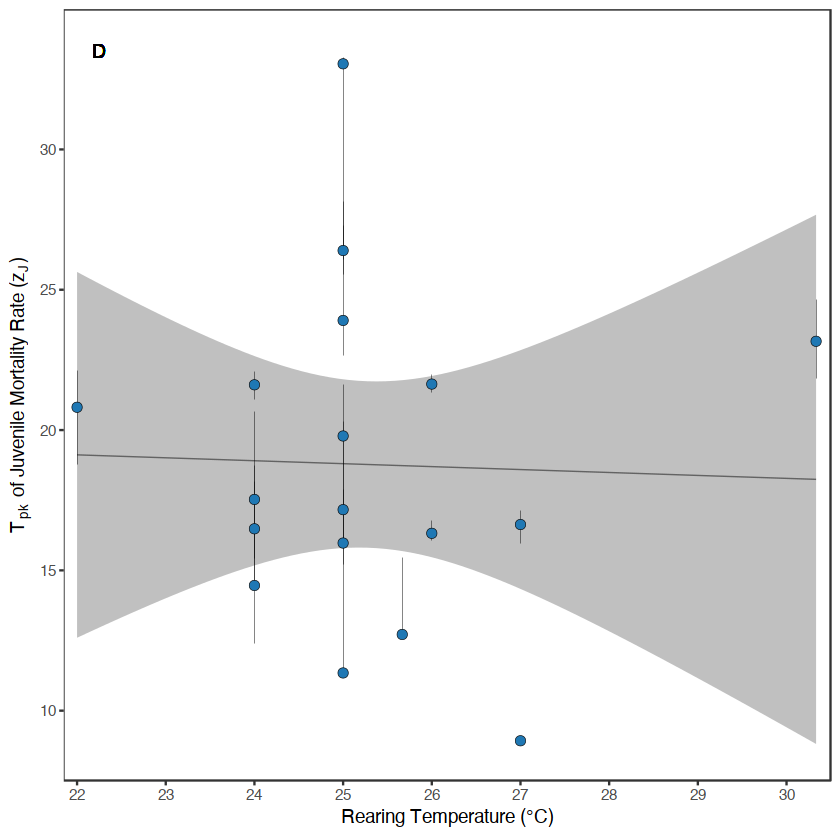

In [69]:
Rear_zj <- ggplot(RearZetaJ, aes(x=RTemp, y=estimate)) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill='#636363')+
  geom_linerange(aes(ymin =conf_lower , ymax = conf_upper),size= 0.1,col="#000000") +
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape = 21, fill="#1f78b4")+
  theme_bw()+
  scale_x_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)"))),
                     limits =c(21.85,30.5),
                     expand = c(0, 0),
                     breaks=seq(22,30, by=1))+
  scale_y_continuous(expression(paste(italic(T[pk]), " of Juvenile Mortality Rate (", italic(z[J]),")")),
                     limits =c(7.5,35),
                     expand = c(0, 0),
                     breaks=seq(10,30, by=5))+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 22.25, y = 33.5,label = "D"), 
            parse = TRUE, size = 4, colour = "black")

Rear_zj

## Relationship of $T_{pk}$ of $z$ vs Rearing Temperature

In [70]:
########## Relationship of $T_{pk}$ of $z$ vs Rearing Temperature #########

RearDF <- as_tibble(read_csv('../data/TraitData.csv')) %>% 
  select(standardisedtraitname,interactor1,interactor1growthtemp) %>%
  filter(interactor1growthtemp != 'not stated' & 
           interactor1growthtemp != 'various' & interactor1growthtemp != 'NA' ) %>%
  rename(trait = standardisedtraitname, species = interactor1, RearTemp = interactor1growthtemp) %>%
  mutate(RearTemp = as.numeric(RearTemp))

RearZeta <- RearDF %>% filter(trait == 'z') %>% 
  group_by(species) %>% 
  summarise(avg = mean(RearTemp)) %>%
  arrange(avg) %>%
  mutate(Rcurve_ID = case_when(species == 'Plutella xylostella' ~ '1',
                               species == 'Aedes albopictus' ~ '32',
                               species == 'Paracoccus marginatus' ~ '3',
                               species == 'Acyrthosiphon pisum' ~ '4',
                               species == 'Tribolium castaneum' ~ '6',
                               species == 'Aedes krombeini' ~ '7',
                               species == 'Tetraneura nigriabdominalis' ~ '12',
                               species == 'Stethorus punctillum' ~ '14',
                               species == 'Tetranychus mcdanieli' ~ '15',
                               species == 'Muscidifurax zaraptor' ~ '9',
                               species == 'Aphis nasturtii' ~ '2',
                               species == 'Rhopalosiphum maidis' ~ '5',
                               species == 'Anopheles gambiae' ~ '20',
                               species == 'Anthonomus grandis' ~ '27',
                               species == 'Helicoverpa armigera' ~ '28',
                               species == 'Antestiopsis thunbergii' ~ '29',
                               species == 'Monochamus leuconotus' ~ '30',
                               species == 'Culex pipiens' ~ '31',
                               species == 'Phenacoccus solenopsis' ~ '32',
                               species == 'Culex quinquefasciatus' ~ '33',
                               species == 'Thrips hawaiiensis' ~ '34')) %>%
  arrange(Rcurve_ID) %>% rename(Rspecies = species, RTemp = avg) %>%
  filter(Rcurve_ID != 'NA')

# RearZeta %>% distinct(Rspecies) %>% print(n=60)

head(RearZeta)

Rows: 1292 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rspecies,RTemp,Rcurve_ID
<chr>,<dbl>,<chr>
Plutella xylostella,23,1
Tetraneura nigriabdominalis,25,12
Stethorus punctillum,24,14
Tetranychus mcdanieli,25,15
Aphis nasturtii,24,2
Anopheles gambiae,26,20


In [71]:
zeta  <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv', header = TRUE)) %>%
  filter(param == 'topt') %>% 
  select(species, estimate, conf_lower, conf_upper, trait) %>%
  mutate(curve_ID = case_when(species == 'Plutella xylostella' ~ '1',
                               species == 'Aedes albopictus' ~ '32',
                               species == 'Paracoccus marginatus' ~ '3',
                               species == 'Acyrthosiphon pisum' ~ '4',
                               species == 'Tribolium castaneum' ~ '6',
                               species == 'Aedes krombeini' ~ '7',
                               species == 'Tetraneura nigriabdominalis' ~ '12',
                               species == 'Stethorus punctillum' ~ '14',
                               species == 'Tetranychus mcdanieli' ~ '15',
                               species == 'Muscidifurax zaraptor' ~ '9',
                               species == 'Aphis nasturtii' ~ '2',
                               species == 'Rhopalosiphum maidis' ~ '5',
                               species == 'Anopheles gambiae' ~ '20',
                               species == 'Anthonomus grandis' ~ '27',
                               species == 'Helicoverpa armigera' ~ '28',
                               species == 'Antestiopsis thunbergii' ~ '29',
                               species == 'Monochamus leuconotus' ~ '30',
                               species == 'Culex pipiens' ~ '31',
                               species == 'Phenacoccus solenopsis' ~ '32',
                               species == 'Culex quinquefasciatus' ~ '33',
                               species == 'Thrips hawaiiensis' ~ '34')) %>%
  arrange(curve_ID) %>% 
  filter(curve_ID != 'NA')

  
# zeta %>% distinct(species) %>% print(n=30)

head(zeta)

species,estimate,conf_lower,conf_upper,trait,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Plutella xylostella,14.090,13.51328,14.69950,adult mortality rate,1
Tetraneura nigriabdominalis,11.130,11.18229,11.65840,adult mortality rate,12
Stethorus punctillum,15.723,13.95997,17.65583,adult mortality rate,14
Tetranychus mcdanieli,15.794,14.36049,16.77067,adult mortality rate,15
Aphis nasturtii,16.351,15.74553,16.99934,adult mortality rate,2
Anopheles gambiae,19.005,17.73745,21.49621,adult mortality rate,20


In [72]:
RearZeta <- bind_cols(zeta,RearZeta)

head(RearZeta)

species,estimate,conf_lower,conf_upper,trait,curve_ID,Rspecies,RTemp,Rcurve_ID
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
Plutella xylostella,14.090,13.51328,14.69950,adult mortality rate,1,Plutella xylostella,23,1
Tetraneura nigriabdominalis,11.130,11.18229,11.65840,adult mortality rate,12,Tetraneura nigriabdominalis,25,12
Stethorus punctillum,15.723,13.95997,17.65583,adult mortality rate,14,Stethorus punctillum,24,14
Tetranychus mcdanieli,15.794,14.36049,16.77067,adult mortality rate,15,Tetranychus mcdanieli,25,15
Aphis nasturtii,16.351,15.74553,16.99934,adult mortality rate,2,Aphis nasturtii,24,2
Anopheles gambiae,19.005,17.73745,21.49621,adult mortality rate,20,Anopheles gambiae,26,20


In [73]:
Rzeta_model <- lm(estimate ~ RTemp, RearZeta); summary(Rzeta_model)


Call:
lm(formula = estimate ~ RTemp, data = RearZeta)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8956 -1.5946 -0.9668  1.8404  9.3864 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -9.0338    17.6689  -0.511    0.615
RTemp         1.0474     0.6951   1.507    0.148

Residual standard error: 4.737 on 19 degrees of freedom
Multiple R-squared:  0.1068,	Adjusted R-squared:  0.05974 
F-statistic: 2.271 on 1 and 19 DF,  p-value: 0.1483


`geom_smooth()` using formula 'y ~ x'



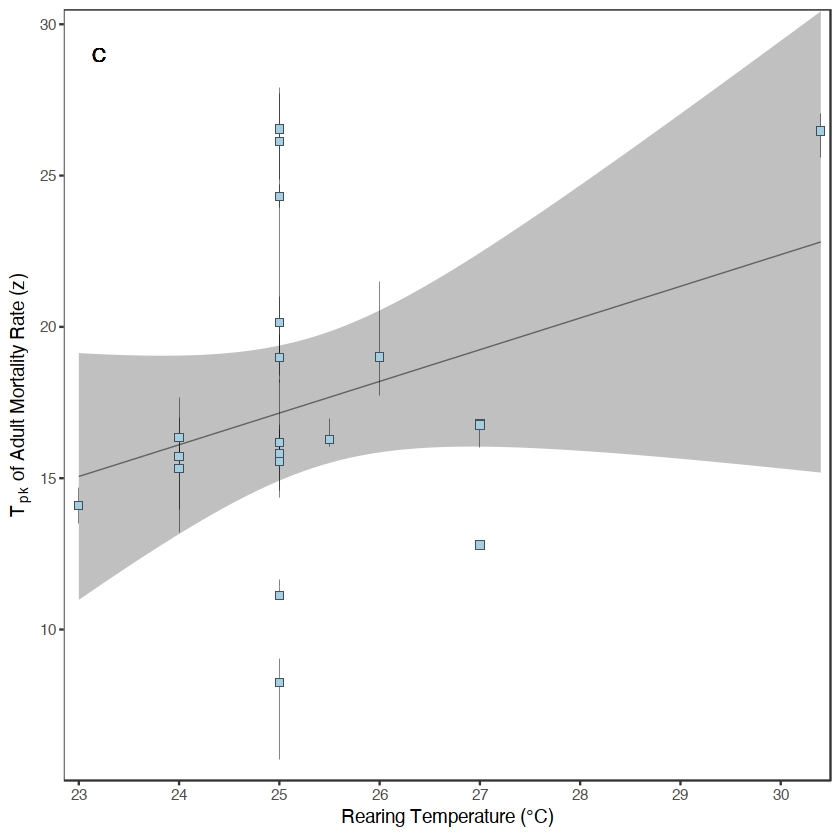

In [74]:
Rear_z <- ggplot(RearZeta, aes(x=RTemp, y=estimate)) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill='#636363') +
  geom_linerange(aes(ymin =conf_lower , ymax = conf_upper),size= 0.1,col="#000000") +
  geom_point(size = 2.5,stroke=0.2, col = '#000000', shape=22, fill ="#a6cee3")+
  theme_bw()+
  scale_x_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)"))),
                     limits =c(22.85,30.5),
                     expand = c(0, 0),
                     breaks=seq(21,32, by=1))+
  scale_y_continuous(expression(paste(italic(T[pk]), " of Adult Mortality Rate (", italic(z),")")),
                     limits =c(5,30.5),
                     expand = c(0, 0),
                     breaks=seq(10,30, by=5))+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = 23.2, y = 29,label = "C"), 
            parse = TRUE, size = 4, colour = "black")

Rear_z

In [75]:
p1 <- ggarrange(Rear_alp,Rear_bmax,Rear_z,Rear_zj, nrow=2, ncol=2)

ggsave("../results/SI/Traits_RearTemp_Adapt.pdf", p1, width = 17, height =15, units = "cm",device = cairo_pdf)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



# Relationship between Latitude and Rearing Temperature 

In [76]:
##### Relationship between Latitude and Rearing Temperature #####

RearTemp_vs_Lat_Data <- as_tibble(read_csv('../data/TraitData.csv')) %>% 
          select(standardisedtraitname, interactor1, interactor1temp, interactor1growthtemp, latitude) %>%
          filter(interactor1growthtemp != 'not stated' & interactor1growthtemp != 'various' & 
                 interactor1growthtemp != 'NA' & latitude != 'NA') %>%
          rename(trait = standardisedtraitname, species = interactor1, RearTemp = interactor1growthtemp) %>%
          mutate(RearTemp = as.numeric(RearTemp), RearTemp = as.numeric(RearTemp))

head(RearTemp_vs_Lat_Data)

Rows: 1292 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): originalid, originaltraitname, originaltraitdef, standardisedtrait...
dbl  (6): originaltraitvalue, originalerrorpos, originalerrorneg, standardis...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


trait,species,interactor1temp,RearTemp,latitude
<chr>,<chr>,<chr>,<dbl>,<dbl>
1/alpha,Acyrthosiphon pisum,10,25,36.5
1/alpha,Acyrthosiphon pisum,15,25,36.5
bmax,Acyrthosiphon pisum,10,25,36.5
z,Acyrthosiphon pisum,10,25,36.5
1/alpha,Acyrthosiphon pisum,20,25,36.5
1/alpha,Acyrthosiphon pisum,25,25,36.5


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



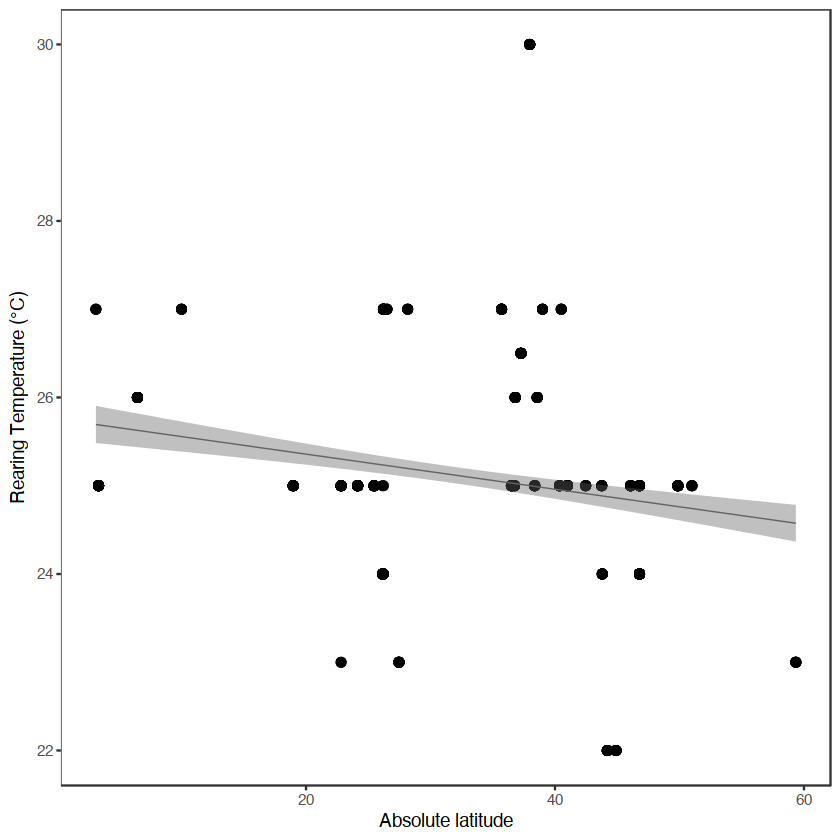

In [77]:
RearTemp_vs_Lat <- ggplot(RearTemp_vs_Lat_Data, aes(x=abs(latitude), y=RearTemp)) +
  geom_point(size = 2.5,stroke=0.2, col = '#000000')+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="#636363") +
  theme_bw()+
  scale_y_continuous(expression(plain(paste("Rearing Temperature (",degree,"C)")))) +
  scale_x_continuous(expression(plain(paste("Absolute latitude"))))+
  theme(legend.position = 'none',legend.text = element_text(size = 10))+
  theme(text=element_text(family="Times"), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

RearTemp_vs_Lat

ggsave("../results/SI/RearTemp_vs_Latitude.pdf",RearTemp_vs_Lat, width = 8, height =8, units = "cm",device = cairo_pdf)

In [78]:
RearTemp_vs_Lat_model <- lm(RearTemp ~ abs(latitude), RearTemp_vs_Lat_Data); summary(RearTemp_vs_Lat_model)


Call:
lm(formula = RearTemp ~ abs(latitude), data = RearTemp_vs_Lat_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8765 -0.6895 -0.0297  0.3726  4.9995 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.75587    0.11678 220.551  < 2e-16 ***
abs(latitude) -0.01989    0.00340  -5.852 7.46e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.25 on 703 degrees of freedom
Multiple R-squared:  0.04645,	Adjusted R-squared:  0.04509 
F-statistic: 34.24 on 1 and 703 DF,  p-value: 7.459e-09
